# MAKİNE ÖĞRENMESİ MODELLERİ İLE TÜRKİYE COVID19 VAKA TAHMİNLEMESİ

In [1]:
import pandas as pd
import numpy as np
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
import csv

# Güncel Veri Çekme

In [2]:
%%time
tarih=[]
toplam_test=[]
toplam_vaka=[]
toplam_vefat=[]
pneumonia=[]
agir_hasta=[]
iyilesen=[]
bugun_vaka=[]
bugun_hasta=[]
bugun_test=[]
bugun_vefat=[]
bugun_iyilesen=[]


#options = webdriver.ChromeOptions()
#options.binary_location = "C:\Program Files\Google\Chrome\Application\chrome.exe"
#chrome_driver_binary = r"C:\Users\Nafiz\Python\chromedriver_win32\chromedriver.exe"
#driver = webdriver.Chrome(chrome_driver_binary, options=options)
driver = webdriver.Chrome(ChromeDriverManager().install())

base_url = str("https://covid19.saglik.gov.tr/TR-66935/genel-koronavirus-tablosu.html")
driver.get(base_url)

rows = 1 + len(driver.find_elements_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr"))


tables = WebDriverWait(driver,20).until(EC.presence_of_all_elements_located((By.XPATH,"//*[@id='TumVerileriGetir']")))

for table in tables:

    for r in range(1, rows):
        
        tarih.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[1]").get_attribute('textContent').strip())

        toplam_test.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[2]").get_attribute('textContent').strip())

        toplam_vaka.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[3]").get_attribute('textContent').strip())
        
        toplam_vefat.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[4]").get_attribute('textContent').strip())
        
        pneumonia.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[5]").get_attribute('textContent').strip())
        
        agir_hasta.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[6]").get_attribute('textContent').strip())
        
        iyilesen.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[7]").get_attribute('textContent').strip())
        
        bugun_vaka.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[8]").get_attribute('textContent').strip())
        
        bugun_hasta.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[9]").get_attribute('textContent').strip())
        
        bugun_test.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[10]").get_attribute('textContent').strip())
        
        bugun_vefat.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[11]").get_attribute('textContent').strip())
        
        bugun_iyilesen.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[12]").get_attribute('textContent').strip())



df = pd.DataFrame({"Tarih":tarih, 
                   "Toplam Test Sayısı":toplam_test, 
                   "Toplam Vaka Sayısı":toplam_vaka, 
                   "Toplam Vefat Sayısı":toplam_vefat,
                   "Hastalarda Zatürre Oranı (%)":pneumonia, 
                   "Ağır Hasta Sayısı":agir_hasta, 
                   "Toplam İyileşen Hasta Sayısı": iyilesen, 
                   "Bugünkü Vaka Sayısı": bugun_vaka,
                   "Bugünkü Hasta Sayısı":bugun_hasta, 
                   "Bugünkü Test Sayısı":bugun_test, 
                   "Bugünkü Vefat Sayısı":bugun_vefat, 
                   "Bugünkü İyileşen Sayısı":bugun_iyilesen})



====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
Driver [C:\Users\Nafiz\.wdm\drivers\chromedriver\win32\90.0.4430.24\chromedriver.exe] found in cache


Wall time: 2min 36s


In [3]:
df.to_excel("covid19_data.xlsx", index=False, encoding="utf-8-sig")

In [4]:
csv = 'covid19_data.xlsx'
covid_tr = pd.read_excel(csv, thousands=".")
df = covid_tr.copy()    

# Veri İnceleme

In [5]:
df.head()

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2 MAYIS 2021,47744338.0,4875388,40844.0,"2,4",3532.0,4480381.0,25980.0,2587.0,240145.0,340.0,75182.0
1,1 MAYIS 2021,47504193.0,4849408,40504.0,"2,4",3525.0,4405199.0,28817.0,2615.0,242194.0,373.0,81302.0
2,30 NİSAN 2021,47261999.0,4820591,40131.0,"2,4",3534.0,4323897.0,31891.0,2673.0,265287.0,394.0,68183.0
3,29 NİSAN 2021,46996712.0,4788700,39737.0,"2,4",3581.0,4255714.0,37674.0,2715.0,278108.0,339.0,43253.0
4,28 NİSAN 2021,46718604.0,4751026,39398.0,"2,4",3558.0,4212461.0,40444.0,2728.0,283261.0,341.0,45198.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tarih                         418 non-null    object 
 1   Toplam Test Sayısı            402 non-null    float64
 2   Toplam Vaka Sayısı            418 non-null    int64  
 3   Toplam Vefat Sayısı           412 non-null    float64
 4   Hastalarda Zatürre Oranı (%)  278 non-null    object 
 5   Ağır Hasta Sayısı             278 non-null    float64
 6   Toplam İyileşen Hasta Sayısı  402 non-null    float64
 7   Bugünkü Vaka Sayısı           159 non-null    float64
 8   Bugünkü Hasta Sayısı          402 non-null    float64
 9   Bugünkü Test Sayısı           402 non-null    float64
 10  Bugünkü Vefat Sayısı          402 non-null    float64
 11  Bugünkü İyileşen Sayısı       394 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 39.3+ KB


In [7]:
df.isnull().sum()

Tarih                             0
Toplam Test Sayısı               16
Toplam Vaka Sayısı                0
Toplam Vefat Sayısı               6
Hastalarda Zatürre Oranı (%)    140
Ağır Hasta Sayısı               140
Toplam İyileşen Hasta Sayısı     16
Bugünkü Vaka Sayısı             259
Bugünkü Hasta Sayısı             16
Bugünkü Test Sayısı              16
Bugünkü Vefat Sayısı             16
Bugünkü İyileşen Sayısı          24
dtype: int64

# Data Tipi Değiştirme ve Eksik Verileri Doldurma

In [8]:
df["Toplam Test Sayısı"] = df["Toplam Test Sayısı"].fillna(0).astype(int)
df["Toplam Vaka Sayısı"] = df["Toplam Vaka Sayısı"].fillna(0).astype(int)

df["Toplam Vefat Sayısı"] = df["Toplam Vefat Sayısı"].fillna(0).astype(int)

df["Hastalarda Zatürre Oranı (%)"] = df["Hastalarda Zatürre Oranı (%)"].str.replace(',', '.', regex=True).fillna(0).astype(float)

df["Ağır Hasta Sayısı"] = df["Ağır Hasta Sayısı"].fillna(0).astype(int)

df["Toplam İyileşen Hasta Sayısı"] = df["Toplam İyileşen Hasta Sayısı"].fillna(0).astype(int)

df["Bugünkü Vaka Sayısı"] = df["Bugünkü Vaka Sayısı"].fillna(0).astype(int)
df["Bugünkü Hasta Sayısı"] = df["Bugünkü Hasta Sayısı"].fillna(0).astype(int)
df["Bugünkü Test Sayısı"] = df["Bugünkü Test Sayısı"].fillna(0).astype(int)
df["Bugünkü Vefat Sayısı"] = df["Bugünkü Vefat Sayısı"].fillna(0).astype(int)
df["Bugünkü İyileşen Sayısı"] = df["Bugünkü İyileşen Sayısı"].fillna(0).astype(int)

## Tarih

In [9]:
months = {'monthStr':  [' OCAK ', ' ŞUBAT ', ' MART ', ' NİSAN ', ' MAYIS ', ' HAZİRAN ', ' TEMMUZ ', ' AĞUSTOS ',' EYLÜL ',' EKİM ', ' KASIM ', ' ARALIK '],
          'monthInt': ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']
         }
for i, j in df.iterrows():
    for k in range(12):
        df["Tarih"].loc[i] = df["Tarih"].loc[i].replace(months["monthStr"][k], months["monthInt"][k])

D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
import datetime

def date_convert(date_to_convert):
     return datetime.datetime.strptime(date_to_convert, "%d-%m-%Y").strftime("%Y-%m-%d")
    
df['Tarih'] = df['Tarih'].apply(date_convert)

In [11]:
df = df[::-1].reset_index(drop=True)

df['Tarih'] = pd.to_datetime(df['Tarih'], format='%Y-%m-%d')

df['Tarih'] = pd.to_datetime(df['Tarih']).dt.date

## Günlük Vaka Sayısı Doldurulması

In [12]:
for i in range(len(df[:259])):
    if(i == 0):
        df["Bugünkü Vaka Sayısı"].loc[i] = 1
    else:
        a = df["Toplam Vaka Sayısı"].loc[i+1] - df["Toplam Vaka Sayısı"].loc[i]
        df["Bugünkü Vaka Sayısı"].loc[i+1] = a

In [13]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2020-03-11,0,1,0,0.0,0,0,1,0,0,0,0
1,2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0
2,2020-03-13,0,5,0,0.0,0,0,4,0,0,0,0
3,2020-03-14,0,6,0,0.0,0,0,1,0,0,0,0
4,2020-03-15,0,18,0,0.0,0,0,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,2021-04-28,46718604,4751026,39398,2.4,3558,4212461,40444,2728,283261,341,45198
414,2021-04-29,46996712,4788700,39737,2.4,3581,4255714,37674,2715,278108,339,43253
415,2021-04-30,47261999,4820591,40131,2.4,3534,4323897,31891,2673,265287,394,68183
416,2021-05-01,47504193,4849408,40504,2.4,3525,4405199,28817,2615,242194,373,81302


# Görselleştirmeler

In [14]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.dates import DateFormatter

In [15]:
new_df = df.copy()
new_df.index = new_df["Tarih"]
new_df.index = pd.DatetimeIndex(new_df.index)
new_df.drop(["Tarih"], axis=1, inplace=True)

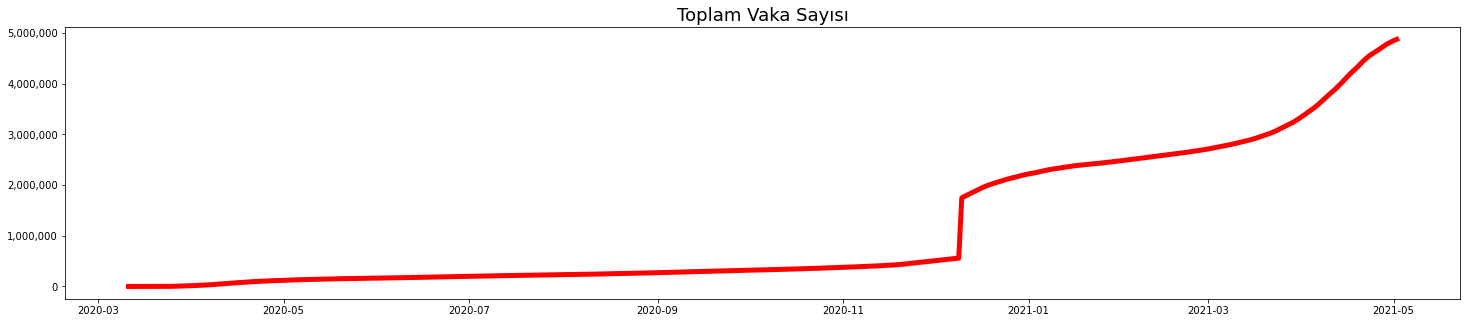

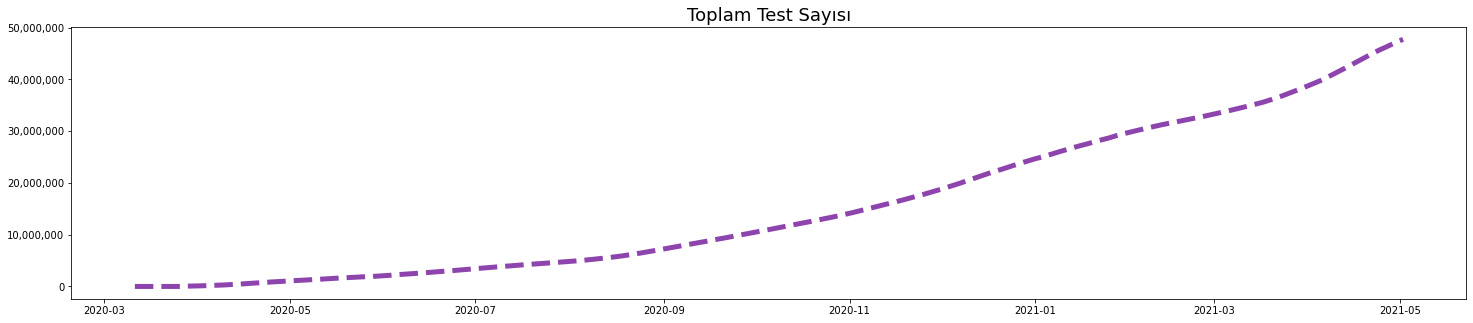

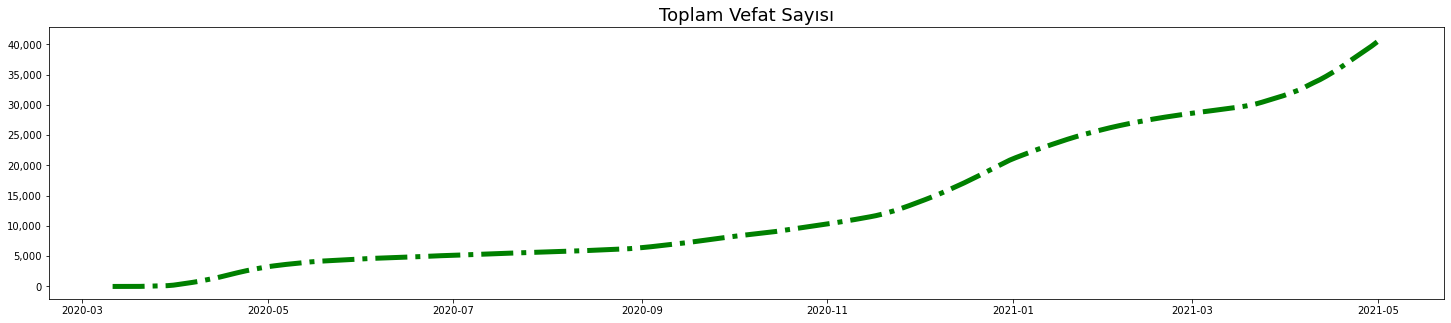

In [16]:
list_select=["Toplam Vaka Sayısı", "Toplam Test Sayısı", "Toplam Vefat Sayısı"]

fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Vaka Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Vaka Sayısı"],lw=5,color="#FF0000")


fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Test Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Test Sayısı"],"--",lw=5,color="#8E44AD")


fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Vefat Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Vefat Sayısı"],"-.",lw=5,color="#008000")

# MODELLER

## SARIMAX

In [17]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

In [18]:
print("Bugünkü Vaka Sayısı")
print(testStationarity(new_df["Bugünkü Vaka Sayısı"]))

print("Bugünkü Hasta Sayısı")
print(testStationarity(new_df["Bugünkü Hasta Sayısı"]))

print("Bugünkü Vefat Sayısı")
print(testStationarity(new_df["Bugünkü Vefat Sayısı"]))

Bugünkü Vaka Sayısı
Test Statistic                  -2.069750
p-value                          0.256851
#Lags Used                      17.000000
Number of Observations Used    400.000000
Critical Value (1%)             -3.446804
Critical Value (5%)             -2.868793
Critical Value (10%)            -2.570634
dtype: float64
Bugünkü Hasta Sayısı
Test Statistic                  -2.791195
p-value                          0.059543
#Lags Used                      18.000000
Number of Observations Used    399.000000
Critical Value (1%)             -3.446846
Critical Value (5%)             -2.868811
Critical Value (10%)            -2.570643
dtype: float64
Bugünkü Vefat Sayısı
Test Statistic                  -2.679821
p-value                          0.077596
#Lags Used                      15.000000
Number of Observations Used    402.000000
Critical Value (1%)             -3.446722
Critical Value (5%)             -2.868757
Critical Value (10%)            -2.570614
dtype: float64


In [19]:
df.corr()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
Toplam Test Sayısı,1.000000,0.961827,0.993654,-0.127253,0.594975,0.961077,0.757851,0.050628,0.896109,0.738536,0.742402
Toplam Vaka Sayısı,0.961827,1.000000,0.977102,-0.242504,0.470723,0.996539,0.767356,-0.049405,0.826591,0.746867,0.819610
Toplam Vefat Sayısı,0.993654,0.977102,1.000000,-0.173467,0.533794,0.978511,0.739270,-0.010198,0.862559,0.716987,0.745167
Hastalarda Zatürre Oranı (%),-0.127253,-0.242504,-0.173467,1.000000,0.009289,-0.239647,-0.237575,-0.073729,0.003484,-0.177516,-0.215474
Ağır Hasta Sayısı,0.594975,0.470723,0.533794,0.009289,1.000000,0.448158,0.622819,0.645012,0.781350,0.785666,0.515265
Toplam İyileşen Hasta Sayısı,0.961077,0.996539,0.978511,-0.239647,0.448158,1.000000,0.732496,-0.087254,0.806962,0.719137,0.796279
Bugünkü Vaka Sayısı,0.757851,0.767356,0.739270,-0.237575,0.622819,0.732496,1.000000,0.383405,0.852572,0.827401,0.835954
Bugünkü Hasta Sayısı,0.050628,-0.049405,-0.010198,-0.073729,0.645012,-0.087254,0.383405,1.000000,0.318786,0.512872,0.188572
Bugünkü Test Sayısı,0.896109,0.826591,0.862559,0.003484,0.781350,0.806962,0.852572,0.318786,1.000000,0.853697,0.777480
Bugünkü Vefat Sayısı,0.738536,0.746867,0.716987,-0.177516,0.785666,0.719137,0.827401,0.512872,0.853697,1.000000,0.843339


### GÜNLÜK VAKA SAYISI

In [20]:
#!pip install pmdarima

In [21]:
from pmdarima.arima import auto_arima
import statsmodels.api as sm

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7460.759, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7351.961, Time=0.63 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7456.737, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7311.959, Time=1.75 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.82 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7333.543, Time=0.46 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=7313.935, Time=2.99 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=7313.944, Time=3.56 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=7314.015, Time=3.20 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=7.43 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=7313.762, Time=2.26 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]       

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


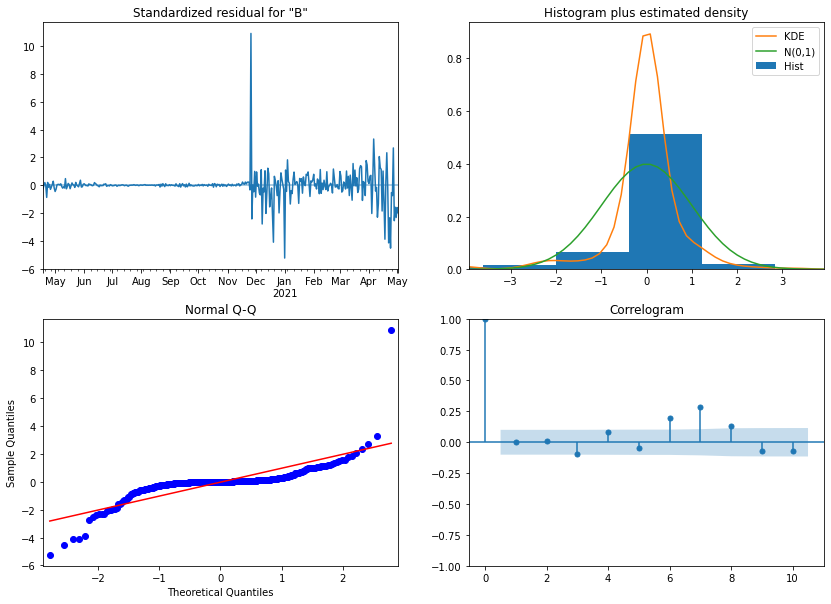

In [22]:
b_vaka_df = new_df["Bugünkü Vaka Sayısı"]
b_vaka_df = pd.DataFrame(b_vaka_df)

results = auto_arima(b_vaka_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)


mod = sm.tsa.statespace.SARIMAX(b_vaka_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_vaka = mod.fit()


results_vaka.plot_diagnostics(figsize=(14,10))
plt.show()

### GÜNLÜK HASTA SAYISI

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.63 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5842.708, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5710.329, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5844.705, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5666.317, Time=0.77 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5668.341, Time=0.59 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5664.914, Time=0.89 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5708.205, Time=0.44 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.87 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.21 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=5665.813, Time=1.69 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=5657.4

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


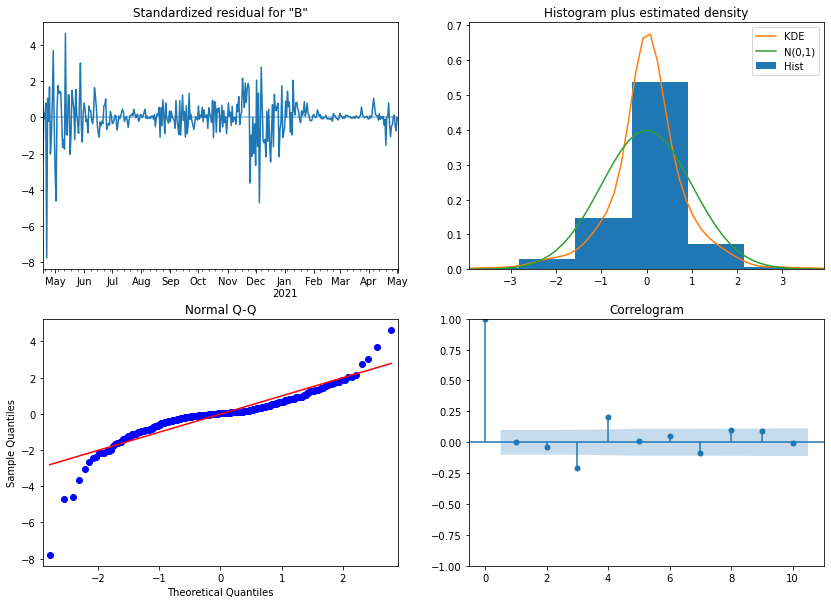

In [23]:
b_hasta_df = new_df["Bugünkü Hasta Sayısı"]
b_hasta_df = pd.DataFrame(b_hasta_df)

results = auto_arima(b_hasta_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)

mod = sm.tsa.statespace.SARIMAX(b_hasta_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_hasta = mod.fit()

results_hasta.plot_diagnostics(figsize=(14,10))
plt.show()

### GÜNLÜK VEFAT SAYISI

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2787.660, Time=0.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2911.062, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2857.883, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2803.676, Time=0.38 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2911.318, Time=0.23 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.18 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2784.902, Time=2.18 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=2786.834, Time=5.49 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=2.66 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=inf, Time=2.79 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=inf, Time=6.89 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=2786.768, Time=5.48 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=inf, Time=3.10 sec
 ARIMA(2,1,0)(0,1,2)[12]             : AIC=inf, T

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


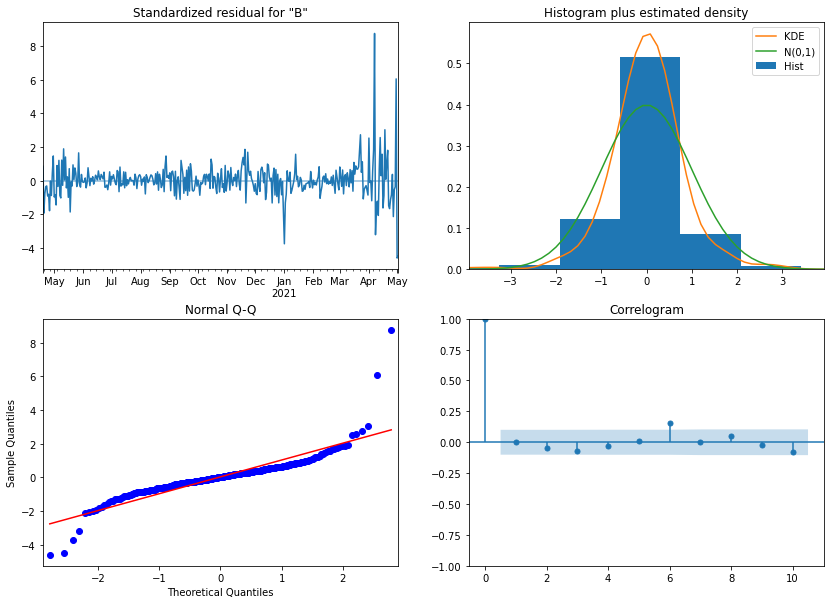

In [24]:
b_vefat_df = new_df["Bugünkü Vefat Sayısı"]
b_vefat_df = pd.DataFrame(b_vefat_df)

results = auto_arima(b_vefat_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)

mod = sm.tsa.statespace.SARIMAX(b_vefat_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_vefat = mod.fit()


results_vefat.plot_diagnostics(figsize=(14,10))
plt.show()

### GERÇEK VE ÖNGÖRÜLEN DEĞERLERİN KARŞILAŞTIRILMASI

In [25]:
#BUGÜNKÜ VAKA SAYISI
pred_vaka = results_vaka.get_prediction(start=pd.to_datetime('2021-03-01'),dynamic=False)
pred_vaka_ci = pred_vaka.conf_int()

pred_vaka_ci['Predicted'] = (pred_vaka_ci['lower Bugünkü Vaka Sayısı'] + pred_vaka_ci['upper Bugünkü Vaka Sayısı'])/2
pred_vaka_ci['Observed'] = b_vaka_df['Bugünkü Vaka Sayısı']
pred_vaka_ci['Diff, %%'] = ((pred_vaka_ci['Predicted'] / pred_vaka_ci['Observed'])-1) * 100
pred_vaka_ci.head()

,lower Bugünkü Vaka Sayısı,upper Bugünkü Vaka Sayısı,Predicted,Observed,"Diff, %%"
2021-03-01,3851.989634,11883.888422,7867.939028,9891,-20.453553
2021-03-02,6462.550699,14494.449486,10478.500093,11837,-11.476725
2021-03-03,8504.552799,16536.451586,12520.502192,11520,8.684915
2021-03-04,8111.825985,16143.724773,12127.775379,11322,7.116900
2021-03-05,6797.912796,14829.811583,10813.862189,11302,-4.319039


In [26]:
#BUGÜNKÜ HASTA SAYISI
pred_hasta = results_hasta.get_prediction(start=pd.to_datetime('2021-03-01'),dynamic=False)
pred_hasta_ci = pred_hasta.conf_int()

pred_hasta_ci['Predicted'] = (pred_hasta_ci['lower Bugünkü Hasta Sayısı'] + pred_hasta_ci['upper Bugünkü Hasta Sayısı'])/2
pred_hasta_ci['Observed'] = b_hasta_df['Bugünkü Hasta Sayısı']
pred_hasta_ci['Diff, %%'] = ((pred_hasta_ci['Predicted'] / pred_hasta_ci['Observed'])-1) * 100
pred_hasta_ci.head()

,lower Bugünkü Hasta Sayısı,upper Bugünkü Hasta Sayısı,Predicted,Observed,"Diff, %%"
2021-03-01,160.778969,1031.355327,596.067148,645,-7.586489
2021-03-02,210.732067,1081.308424,646.020246,668,-3.290382
2021-03-03,247.557407,1118.133764,682.845586,689,-0.893239
2021-03-04,264.584863,1135.161220,699.873041,685,2.171247
2021-03-05,254.694900,1125.271257,689.983079,698,-1.148556


In [27]:
#BUGÜNKÜ VEFAT SAYISI
pred_vefat = results_vefat.get_prediction(start=pd.to_datetime('2021-03-01'),dynamic=False)
pred_vefat_ci = pred_vefat.conf_int()

pred_vefat_ci['Predicted'] = (pred_vefat_ci['lower Bugünkü Vefat Sayısı'] + pred_vefat_ci['upper Bugünkü Vefat Sayısı'])/2
pred_vefat_ci['Observed'] = b_vefat_df['Bugünkü Vefat Sayısı']
pred_vefat_ci['Diff, %%'] = ((pred_vefat_ci['Predicted'] / pred_vefat_ci['Observed'])-1) * 100
pred_vefat_ci.head()

,lower Bugünkü Vefat Sayısı,upper Bugünkü Vefat Sayısı,Predicted,Observed,"Diff, %%"
2021-03-01,48.488521,77.406908,62.947714,69,-8.771429
2021-03-02,52.008271,80.926650,66.467461,68,-2.253734
2021-03-03,52.921378,81.839751,67.380565,65,3.662407
2021-03-04,48.812257,77.730626,63.271442,68,-6.953762
2021-03-05,53.275540,82.193905,67.734722,62,9.249552


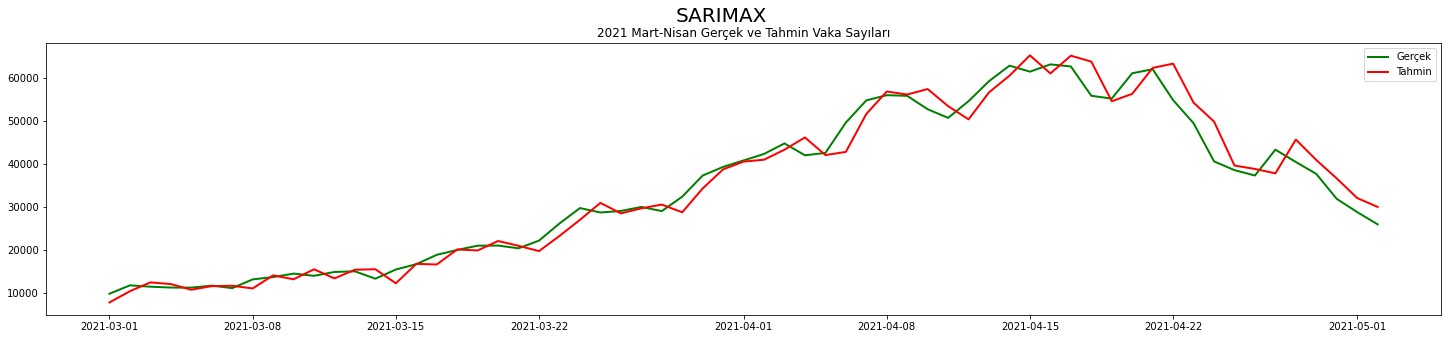

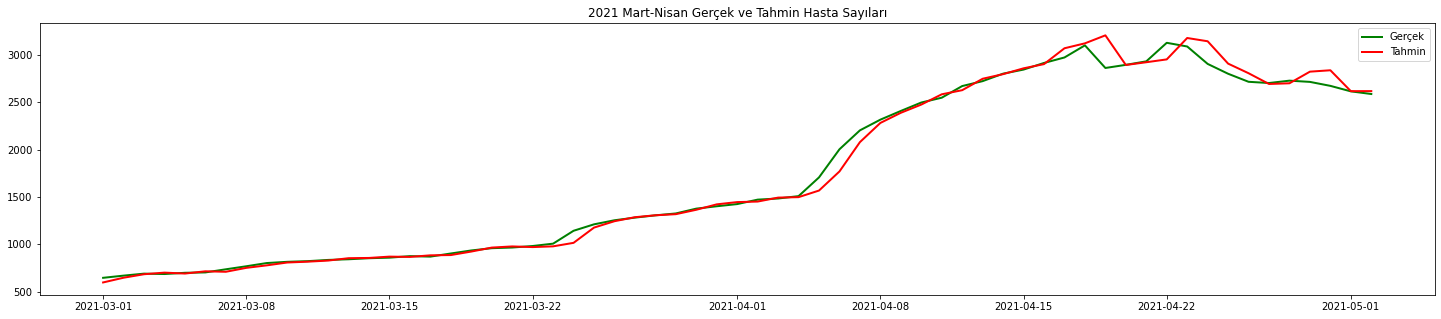

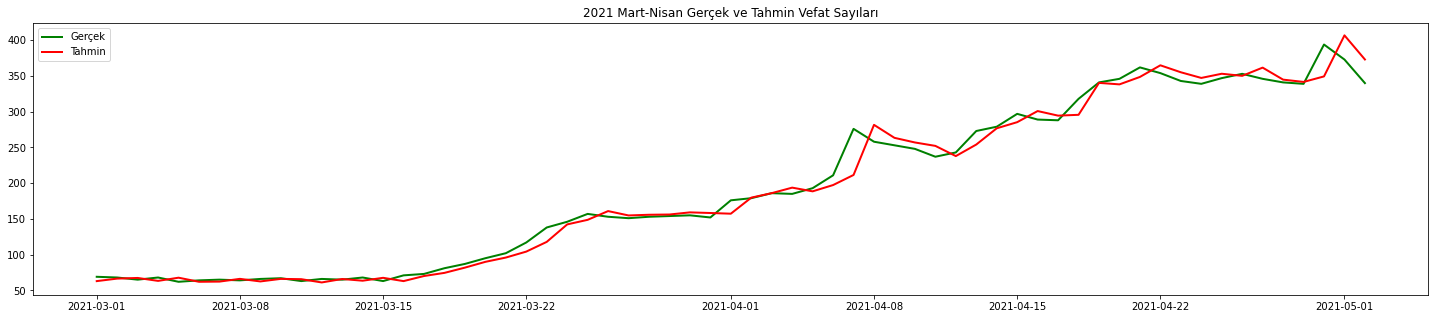

In [28]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
plt.title("2021 Mart-Nisan Gerçek ve Tahmin Vaka Sayıları")
ax.plot(pred_vaka_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_vaka_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

fig, ax = plt.subplots(figsize=(25,5))
plt.title("2021 Mart-Nisan Gerçek ve Tahmin Hasta Sayıları")
ax.plot(pred_hasta_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_hasta_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

fig, ax = plt.subplots(figsize=(25,5))
plt.title("2021 Mart-Nisan Gerçek ve Tahmin Vefat Sayıları")
ax.plot(pred_vefat_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_vefat_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
plt.show()

### İLERİ TARİHLİ TAHMİNLEME

In [29]:
from dateutil.relativedelta import relativedelta

In [30]:
#BUGÜNKÜ VAKA SAYISI
pred_vaka = results_vaka.get_forecast(steps=4)
pred_vaka_ci = pred_vaka.conf_int()

value = pred_vaka.predicted_mean.copy() 
value.index = pd.DatetimeIndex([(pd.to_datetime("today") + relativedelta(months = 1)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 2)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 3)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 4)).strftime("%Y-%m-%d")])
value = pd.DataFrame(value)
value.columns = ["Vaka Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Vaka Sayısı"]
dff_vaka = pd.concat([b_vaka_df, deneme])

In [31]:
#BUGÜNKÜ HASTA SAYISI
pred_hasta = results_hasta.get_forecast(steps=4)
pred_hasta_ci = pred_hasta.conf_int()

value = pred_hasta.predicted_mean.copy() 
value.index = pd.DatetimeIndex([(pd.to_datetime("today") + relativedelta(months = 1)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 2)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 3)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 4)).strftime("%Y-%m-%d")])
value = pd.DataFrame(value)
value.columns = ["Hasta Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Hasta Sayısı"]
dff_hasta = pd.concat([b_hasta_df, deneme])

In [32]:
#BUGÜNKÜ VEFAT SAYISI
pred_vefat = results_vefat.get_forecast(steps=4)
pred_vefat_ci = pred_vefat.conf_int()

value = pred_vefat.predicted_mean.copy() 
value.index = pd.DatetimeIndex([(pd.to_datetime("today") + relativedelta(months = 1)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 2)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 3)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 4)).strftime("%Y-%m-%d")])
value = pd.DataFrame(value)
value.columns = ["Vefat Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Vefat Sayısı"]
dff_vefat = pd.concat([b_vefat_df, deneme])

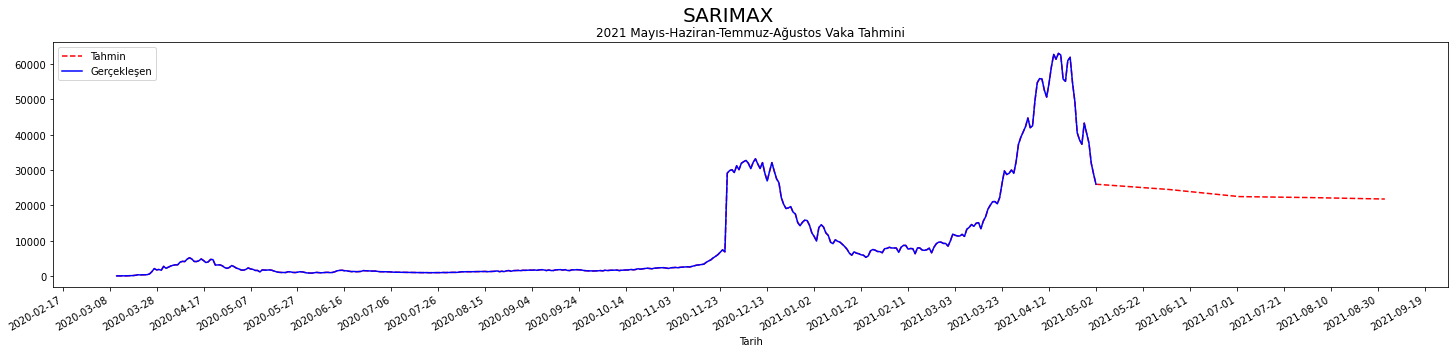

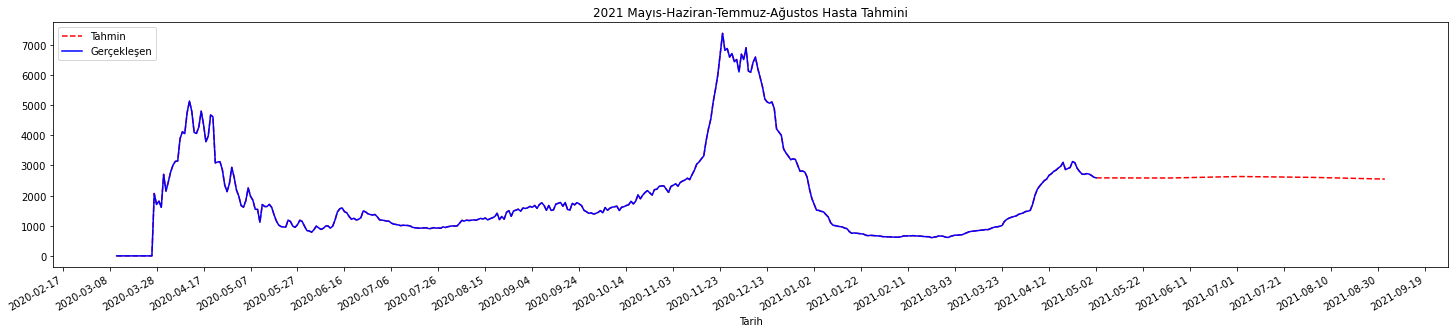

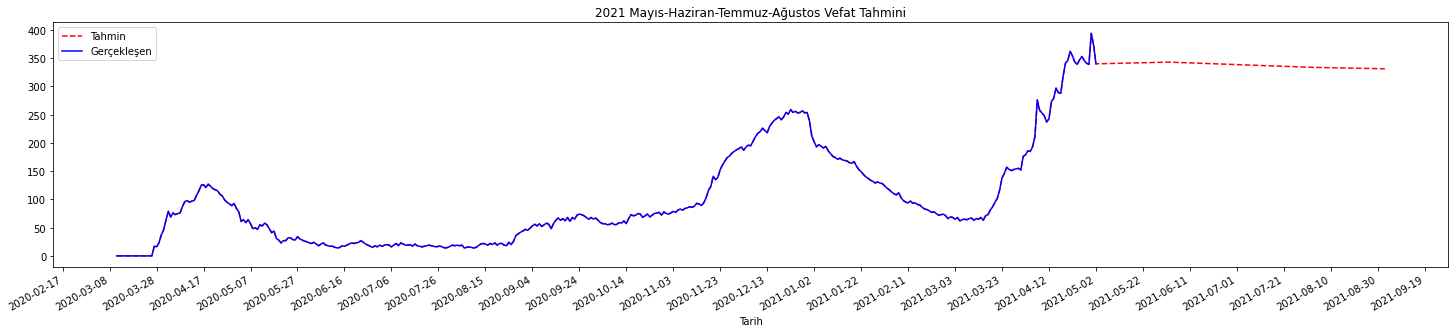

In [33]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
dff_vaka["Bugünkü Vaka Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Vaka Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_vaka_df["Bugünkü Vaka Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")


fig, ax = plt.subplots(figsize=(25,5))
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
dff_hasta["Bugünkü Hasta Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Hasta Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_hasta_df["Bugünkü Hasta Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")


fig, ax = plt.subplots(figsize=(25,5))
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
dff_vefat["Bugünkü Vefat Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Vefat Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_vefat_df["Bugünkü Vefat Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")

In [34]:
sarimax_rmse = np.sqrt(results_vaka.mse)
sarimax_mae = results_vaka.mae

print("RMSE :", sarimax_rmse)
print("MAE :", sarimax_mae)

RMSE : 1957.267987644228
MAE : 834.5140077785561


## MAKİNE ÖĞRENMESİ

In [35]:
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [36]:
ml_df = df.copy()
ml_df['Tarih'] = pd.to_datetime(ml_df['Tarih'], format='%Y-%m-%d')
ml_df['Gün'] = ml_df['Tarih'].dt.day
ml_df['Ay'] = ml_df['Tarih'].dt.month
ml_df['Yıl'] = ml_df['Tarih'].dt.year
ml_df.drop('Tarih', axis=1, inplace=True)
ml_df.head()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı,Gün,Ay,Yıl
0,0,1,0,0.0,0,0,1,0,0,0,0,11,3,2020
1,0,1,0,0.0,0,0,0,0,0,0,0,12,3,2020
2,0,5,0,0.0,0,0,4,0,0,0,0,13,3,2020
3,0,6,0,0.0,0,0,1,0,0,0,0,14,3,2020
4,0,18,0,0.0,0,0,12,0,0,0,0,15,3,2020


In [37]:
ml_df.corr()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı,Gün,Ay,Yıl
Toplam Test Sayısı,1.000000,0.961827,0.993654,-0.127253,0.594975,0.961077,0.757851,0.050628,0.896109,0.738536,0.742402,0.010037,-0.283702,0.874995
Toplam Vaka Sayısı,0.961827,1.000000,0.977102,-0.242504,0.470723,0.996539,0.767356,-0.049405,0.826591,0.746867,0.819610,0.026069,-0.435334,0.903720
Toplam Vefat Sayısı,0.993654,0.977102,1.000000,-0.173467,0.533794,0.978511,0.739270,-0.010198,0.862559,0.716987,0.745167,0.009669,-0.352848,0.905556
Hastalarda Zatürre Oranı (%),-0.127253,-0.242504,-0.173467,1.000000,0.009289,-0.239647,-0.237575,-0.073729,0.003484,-0.177516,-0.215474,-0.059091,0.436662,-0.251794
Ağır Hasta Sayısı,0.594975,0.470723,0.533794,0.009289,1.000000,0.448158,0.622819,0.645012,0.781350,0.785666,0.515265,0.001362,0.405800,0.228772
Toplam İyileşen Hasta Sayısı,0.961077,0.996539,0.978511,-0.239647,0.448158,1.000000,0.732496,-0.087254,0.806962,0.719137,0.796279,0.027516,-0.458000,0.918983
Bugünkü Vaka Sayısı,0.757851,0.767356,0.739270,-0.237575,0.622819,0.732496,1.000000,0.383405,0.852572,0.827401,0.835954,-0.004539,-0.086792,0.546136
Bugünkü Hasta Sayısı,0.050628,-0.049405,-0.010198,-0.073729,0.645012,-0.087254,0.383405,1.000000,0.318786,0.512872,0.188572,0.006265,0.520474,-0.264953
Bugünkü Test Sayısı,0.896109,0.826591,0.862559,0.003484,0.781350,0.806962,0.852572,0.318786,1.000000,0.853697,0.777480,0.011184,0.038372,0.634528
Bugünkü Vefat Sayısı,0.738536,0.746867,0.716987,-0.177516,0.785666,0.719137,0.827401,0.512872,0.853697,1.000000,0.843339,0.052112,-0.008337,0.495122


In [38]:
X = ml_df.drop(["Bugünkü Vaka Sayısı"], axis=1)
y = ml_df["Bugünkü Vaka Sayısı"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### XGBOOST

In [39]:
import xgboost as xg

In [40]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 20, seed = 123)
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [41]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_r.predict(X_test)))
xgb_mae = mean_absolute_error(y_test, xgb_r.predict(X_test))

print("RMSE :", xgb_rmse)
print("MAE :", xgb_mae)

RMSE : 1293.6009424061704
MAE : 585.8263699667795


D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [42]:
xgb_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": xgb_r.predict(X_test)}).sort_index()
xgb_tahmin_df['Tarih'] = np.nan
for i in range(len(xgb_tahmin_df)):
    for j in range(len(df)):
        if(xgb_tahmin_df.iloc[i].name == df.index[j]):
            xgb_tahmin_df["Tarih"].loc[j] = df["Tarih"].loc[j]

D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [43]:
xgb_tahmin_df.index = xgb_tahmin_df["Tarih"]
xgb_tahmin_df.index = pd.DatetimeIndex(xgb_tahmin_df.index)
xgb_tahmin_df.drop(["Tarih"], axis=1, inplace=True)
xgb_tahmin_df.head()

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,45.548740
2020-03-15,12,45.548740
2020-03-16,29,45.548740
2020-03-17,51,45.548740
2020-03-18,93,172.560822


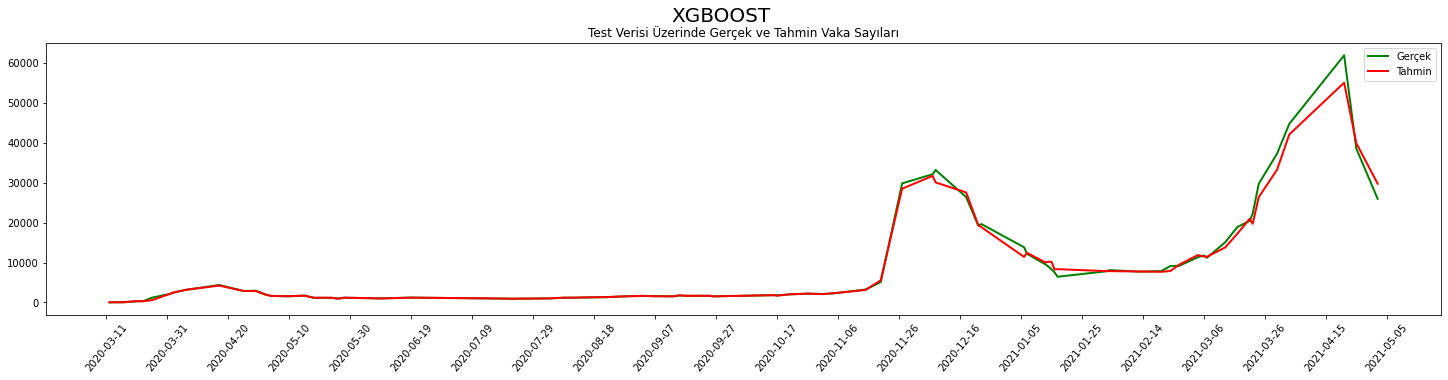

In [44]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('XGBOOST', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(xgb_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(xgb_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

### SKLEARN

In [45]:
sklearn_model = LinearRegression().fit(X_train,y_train)

In [46]:
sklearn_rmse = np.sqrt(mean_squared_error(y_test, sklearn_model.predict(X_test)))
sklearn_mae = mean_absolute_error(y_test, sklearn_model.predict(X_test))

print("RMSE :", sklearn_rmse)
print("MAE :", sklearn_mae)

RMSE : 4223.014235751644
MAE : 2930.0624455135494


In [47]:
sklearn_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": sklearn_model.predict(X_test)}).sort_index()
sklearn_tahmin_df['Tarih'] = np.nan
for i in range(len(sklearn_tahmin_df)):
    for j in range(len(df)):
        if(sklearn_tahmin_df.iloc[i].name == df.index[j]):
            sklearn_tahmin_df["Tarih"].loc[j] = df["Tarih"].loc[j]

D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [48]:
sklearn_tahmin_df.index = sklearn_tahmin_df["Tarih"]
sklearn_tahmin_df.index = pd.DatetimeIndex(sklearn_tahmin_df.index)
sklearn_tahmin_df.drop(["Tarih"], axis=1, inplace=True)
sklearn_tahmin_df.head()

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,51.294095
2020-03-15,12,-664.604642
2020-03-16,29,-902.969895
2020-03-17,51,-1139.593308
2020-03-18,93,-1375.734934


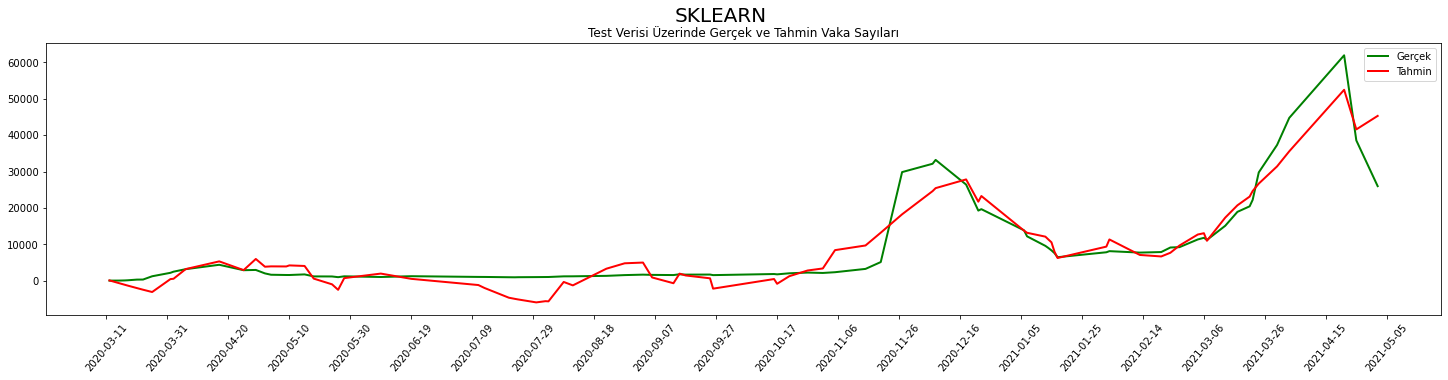

In [49]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SKLEARN', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(sklearn_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(sklearn_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

### DESICION TREE REGRESSOR

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor().fit(X_train,y_train)

In [51]:
dt_regressor_rmse = np.sqrt(mean_squared_error(y_test, dt_regressor.predict(X_test)))
dt_regressor_mae = mean_absolute_error(y_test, dt_regressor.predict(X_test))

print("RMSE :", dt_regressor_rmse)
print("MAE :", dt_regressor_mae)

RMSE : 1536.521012361553
MAE : 675.6071428571429


In [52]:
dc_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": dt_regressor.predict(X_test)}).sort_index()
dc_tahmin_df['Tarih'] = np.nan
for i in range(len(dc_tahmin_df)):
    for j in range(len(df)):
        if(dc_tahmin_df.iloc[i].name == df.index[j]):
            dc_tahmin_df["Tarih"].loc[j] = df["Tarih"].loc[j]

D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [53]:
dc_tahmin_df.index = dc_tahmin_df["Tarih"]
dc_tahmin_df.index = pd.DatetimeIndex(dc_tahmin_df.index)
dc_tahmin_df.drop(["Tarih"], axis=1, inplace=True)
dc_tahmin_df.head()

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,1.0
2020-03-15,12,1.0
2020-03-16,29,1.0
2020-03-17,51,1.0
2020-03-18,93,1.0


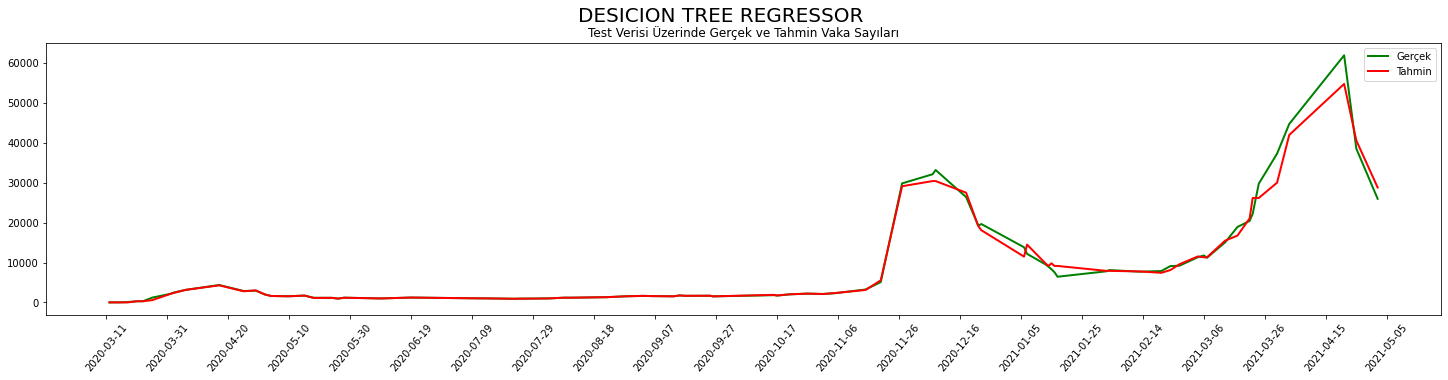

In [54]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('DESICION TREE REGRESSOR', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(dc_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(dc_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

### TENSORFLOW

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [56]:
tf_df = df.copy()
tf_df['Tarih'] = pd.to_datetime(tf_df['Tarih'], format='%Y-%m-%d')
tf_df['Gün'] = tf_df['Tarih'].dt.day
tf_df['Ay'] = tf_df['Tarih'].dt.month
tf_df['Yıl'] = tf_df['Tarih'].dt.year
tf_df.drop(["Tarih"], axis=1, inplace=True)
tf_df.head()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı,Gün,Ay,Yıl
0,0,1,0,0.0,0,0,1,0,0,0,0,11,3,2020
1,0,1,0,0.0,0,0,0,0,0,0,0,12,3,2020
2,0,5,0,0.0,0,0,4,0,0,0,0,13,3,2020
3,0,6,0,0.0,0,0,1,0,0,0,0,14,3,2020
4,0,18,0,0.0,0,0,12,0,0,0,0,15,3,2020


In [58]:
X_tf = tf_df.drop(["Bugünkü Vaka Sayısı"], axis=1)
y_tf = tf_df["Bugünkü Vaka Sayısı"]
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y_tf, test_size = 0.20, random_state = 0)

In [59]:
scaler = MinMaxScaler()

X_train_tf = scaler.fit_transform(X_train_tf)
X_test_tf = scaler.transform(X_test_tf)

In [60]:
tf_model = Sequential()

tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))

tf_model.add(Dense(1))

tf_model.compile(optimizer = "adam", loss = "mse")

tf_model.fit(x = X_train_tf, y = y_train_tf, validation_data = (X_test_tf, y_test_tf), batch_size = 50, epochs = 500)

Epoch 1/500
7/7 [==============================] - 5s 432ms/step - loss: 333395372.0000 - val_loss: 213293904.0000
Epoch 2/500
7/7 [==============================] - 0s 26ms/step - loss: 332478896.0000 - val_loss: 213292880.0000
Epoch 3/500
7/7 [==============================] - 0s 21ms/step - loss: 303609298.0000 - val_loss: 213291392.0000
Epoch 4/500
7/7 [==============================] - 0s 21ms/step - loss: 300062392.0000 - val_loss: 213289200.0000
Epoch 5/500
7/7 [==============================] - 0s 24ms/step - loss: 349422328.0000 - val_loss: 213285568.0000
Epoch 6/500
7/7 [==============================] - 0s 21ms/step - loss: 363795076.0000 - val_loss: 213278848.0000
Epoch 7/500
7/7 [==============================] - 0s 23ms/step - loss: 336323448.0000 - val_loss: 213265584.0000
Epoch 8/500
7/7 [==============================] - 0s 22ms/step - loss: 326515260.0000 - val_loss: 213237024.0000
Epoch 9/500
7/7 [==============================] - 0s 18ms/step - loss: 341280116.0000 

<AxesSubplot:>

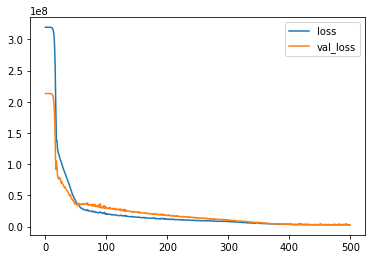

In [61]:
kayipVeri = pd.DataFrame(tf_model.history.history)
kayipVeri.plot()

In [62]:
tahmin_dizi = tf_model.predict(X_test_tf)

trainLoss = tf_model.evaluate(X_train_tf, y_train_tf, verbose = 0)
testLoss = tf_model.evaluate(X_test_tf, y_test_tf, verbose = 0)

print("Train Loss : ", trainLoss)
print("Test Loss : ", testLoss)

Train Loss :  2696636.75
Test Loss :  2784135.75


In [63]:
tf_rmse = np.sqrt(mean_squared_error(y_test_tf, tf_model.predict(X_test_tf)))
tf_mae = mean_absolute_error(y_test_tf, tf_model.predict(X_test_tf))

print("RMSE :", tf_rmse)
print("MAE :", tf_mae)

RMSE : 1668.5729953335679
MAE : 795.5678511120025


In [64]:
tf_tahmin_df = pd.DataFrame(y_test_tf.values, columns = ["Gerçek Vaka Test"])

test_tahmin = pd.Series(tahmin_dizi.reshape(len(tf_tahmin_df),))

tf_tahmin_df = pd.concat([tf_tahmin_df, test_tahmin], axis = 1)
tf_tahmin_df.columns = ["Gerçek Vaka Test", "Tahmin Vaka Test"]
tf_tahmin_df.head()

,Gerçek Vaka Test,Tahmin Vaka Test
0,11770,12331.125977
1,1517,1696.012817
2,2013,1941.025391
3,11322,11993.917969
4,8962,8150.634277


In [65]:
tf_tahmin_df['Tarih'] = np.nan
for i in range(len(tf_tahmin_df)):
    for j in range(len(df)):
        if(tf_tahmin_df["Gerçek Vaka Test"][i] == df["Bugünkü Vaka Sayısı"][j]):
            tf_tahmin_df["Tarih"].loc[i] = df["Tarih"].loc[j]

D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [66]:
tf_tahmin_df.index = tf_tahmin_df["Tarih"]
tf_tahmin_df.index = pd.DatetimeIndex(tf_tahmin_df.index)
tf_tahmin_df.drop(["Tarih"], axis=1, inplace=True)
tf_tahmin_df = tf_tahmin_df.sort_index(axis = 0)
tf_tahmin_df.head()

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,220.681763
2020-03-15,12,222.302841
2020-03-16,29,223.322098
2020-03-17,51,224.324539
2020-03-18,93,225.325455


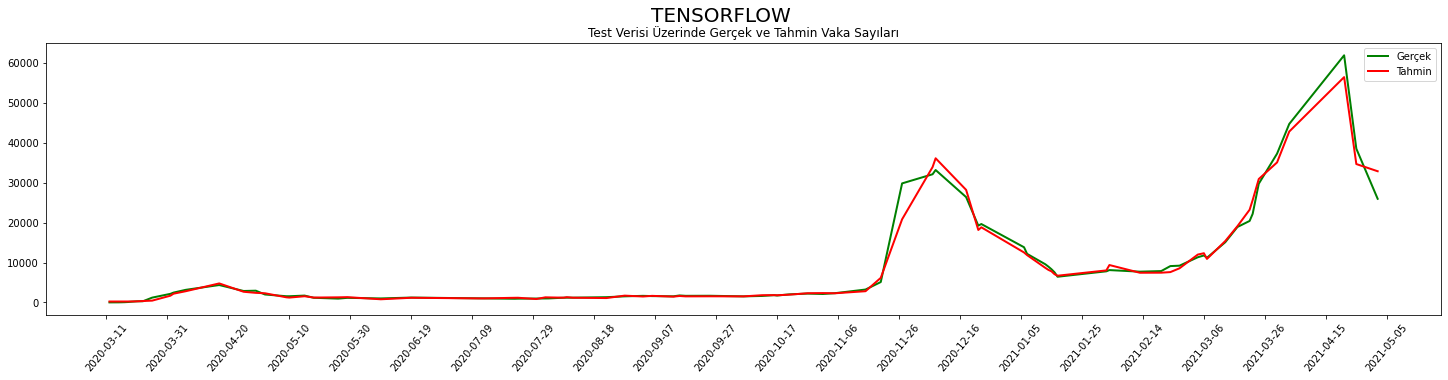

In [67]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('TENSORFLOW', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(tf_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(tf_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

### GRADIENT BOOSTING REGRESSOR

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
params = {'n_estimators': 500,
          'max_depth': 10,
          'min_samples_split': 20,
          'learning_rate': 0.9,
          'loss': 'ls'}

gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.9, max_depth=10, min_samples_split=20,
                          n_estimators=500)

In [70]:
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_model.predict(X_test)))
gbr_mae = mean_absolute_error(y_test, gbr_model.predict(X_test))

print("RMSE :", gbr_rmse)
print("MAE :", gbr_mae)

RMSE : 1668.203115630466
MAE : 733.2162463685677


In [71]:
gbr_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": gbr_model.predict(X_test)}).sort_index()
gbr_tahmin_df['Tarih'] = np.nan
for i in range(len(gbr_tahmin_df)):
    for j in range(len(df)):
        if(gbr_tahmin_df.iloc[i].name == df.index[j]):
            gbr_tahmin_df["Tarih"].loc[j] = df["Tarih"].loc[j]

D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [72]:
gbr_tahmin_df.index = gbr_tahmin_df["Tarih"]
gbr_tahmin_df.index = pd.DatetimeIndex(gbr_tahmin_df.index)
gbr_tahmin_df.drop(["Tarih"], axis=1, inplace=True)
gbr_tahmin_df.head()

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,2.797241
2020-03-15,12,13.010830
2020-03-16,29,11.338772
2020-03-17,51,13.081048
2020-03-18,93,110.707934


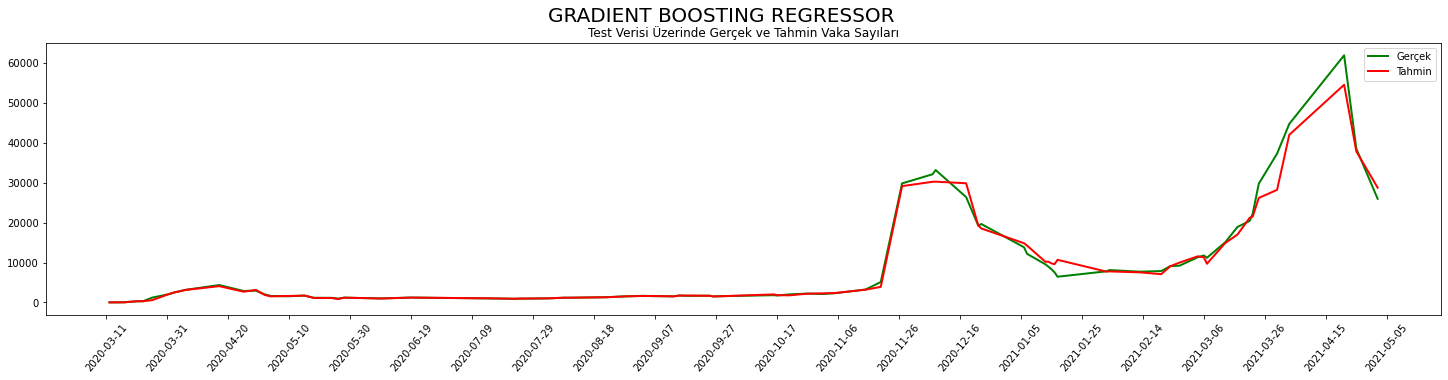

In [73]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('GRADIENT BOOSTING REGRESSOR', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(gbr_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(gbr_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

# MODELLERİN KARŞILAŞTIRILMASI

In [74]:
model_comp = pd.DataFrame({'Models': ["SARIMAX", "XGBOOST", "SKLEARN", "DESICION TREE", "GRADIENT BOOSTING", "TENSORFLOW"], 
                           'RMSE': [sarimax_rmse, xgb_rmse, sklearn_rmse, dt_regressor_rmse, gbr_rmse, tf_rmse],
                           'MAE': [sarimax_mae, xgb_mae, sklearn_mae, dt_regressor_mae, gbr_mae, tf_mae]})
model_comp = model_comp.sort_values(by="RMSE",axis=0, ascending = False).reset_index(drop=True)
model_comp

,Models,RMSE,MAE
0,SKLEARN,4223.014236,2930.062446
1,SARIMAX,1957.267988,834.514008
2,TENSORFLOW,1668.572995,795.567851
3,GRADIENT BOOSTING,1668.203116,733.216246
4,DESICION TREE,1536.521012,675.607143
5,XGBOOST,1293.600942,585.826370


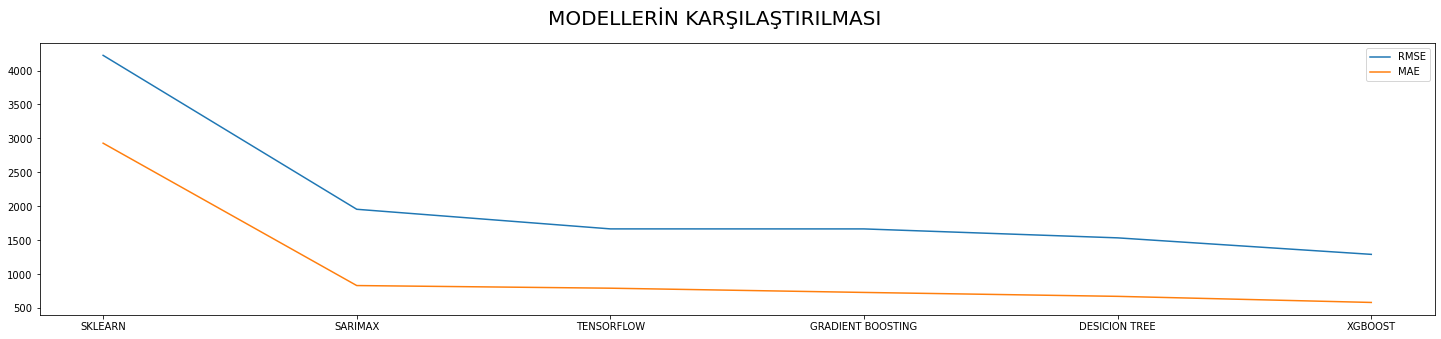

In [75]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('MODELLERİN KARŞILAŞTIRILMASI', fontsize = 20)
plt.plot(model_comp['Models'], model_comp['RMSE'], label = "RMSE")
plt.plot(model_comp['Models'], model_comp['MAE'], label = "MAE")
plt.legend()
plt.show()